TASK-1

===== DATA OVERVIEW =====
    Manufacturer    Model  Engine Size (L) Fuel Type  Year of Manufacture  \
0  Mercedes-Benz    Cruze         1.418475  Electric                 2013   
1         Toyota       A4         4.492330  Electric                 2003   
2           Audi  C-Class         4.739375  Electric                 2000   
3         Nissan  Model 3         3.128423    Petrol                 2011   
4  Mercedes-Benz     Golf         1.650279    Diesel                 2006   

   Mileage  Price  
0    61837  34792  
1   128993  27129  
2    81362  29141  
3   168204  24731  
4   119405  27493   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         149 non-null    object 
 1   Model                149 non-null    object 
 2   Engine Size (L)      149 non-null    float64
 3   Fuel Type            149 non-n

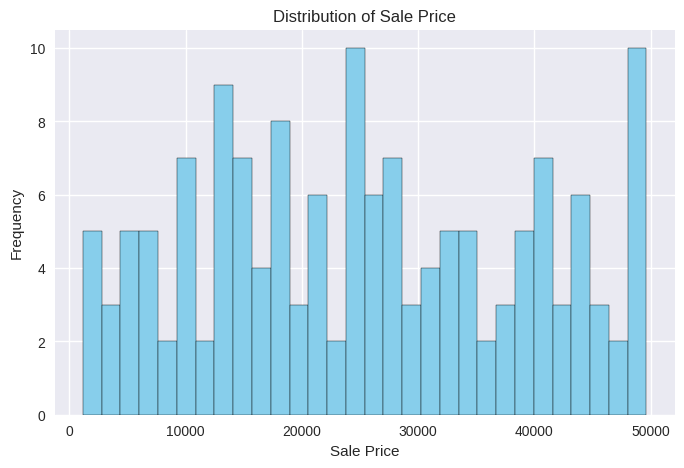

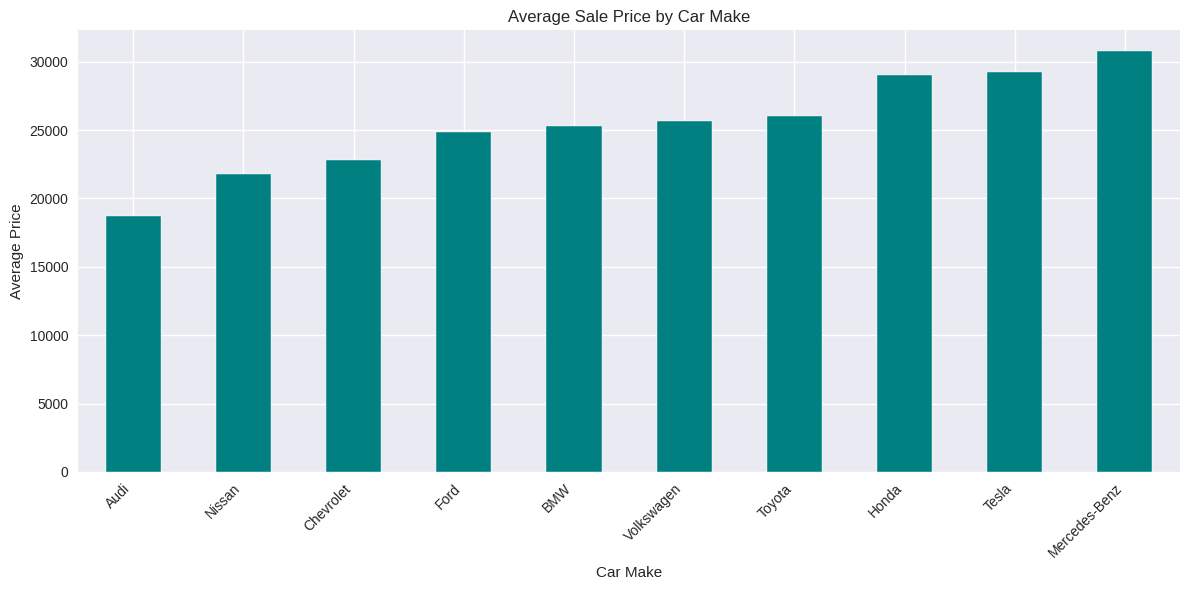

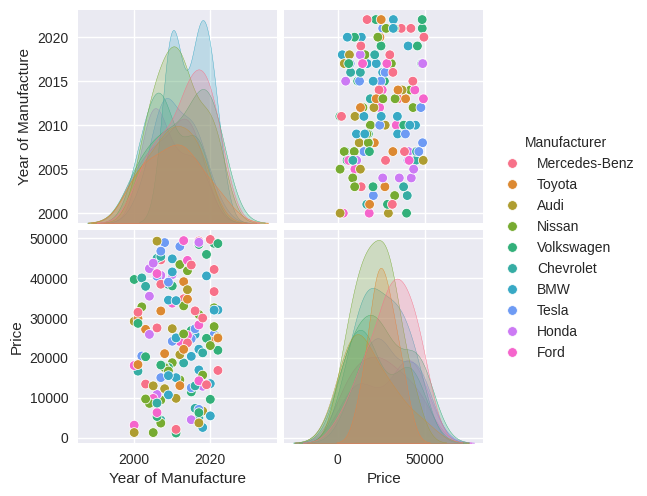

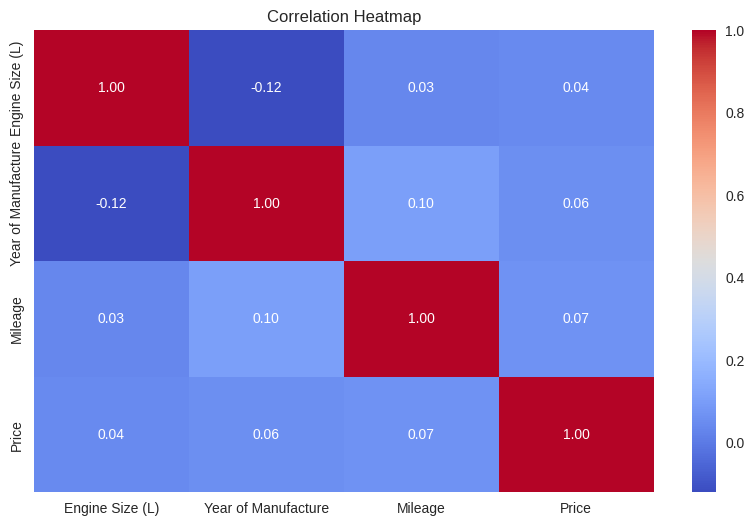

✅ Data Visualization Completed Successfully!


In [ ]:
# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 2️⃣ Load Dataset
# Make sure the dataset file is in your working directory
# Download from: https://www.kaggle.com/datasets/suraj520/car-sales-data?resource=download
df = pd.read_excel("/content/second_car_sale.xlsx")

# Rename the problematic column
df.rename(columns={'Price (Â£)': 'Price'}, inplace=True)


# 3️⃣ Data Overview
print("===== DATA OVERVIEW =====")
print(df.head(), "\n")
print(df.info(), "\n")
print(df.describe(), "\n")

# 4️⃣ Data Cleaning
print("Missing values before cleaning:\n", df.isnull().sum())
df = df.dropna()  # drop missing values
print("Missing values after cleaning:\n", df.isnull().sum())

# Convert Date column if it exists
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# 5️⃣ Exploratory Data Analysis
print("\n===== BASIC STATISTICS =====")
print(df.describe())

# 6️⃣ Matplotlib Visualizations
plt.figure(figsize=(8,5))
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Using 'Manufacturer' instead of 'Car Make' and 'Price' instead of 'Sale Price'
avg_price = df.groupby('Manufacturer')['Price'].mean().sort_values()
plt.figure(figsize=(12,6)) # Increased figure size for better readability with many car makes
avg_price.plot(kind='bar', color='teal')
plt.title('Average Sale Price by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()


# 7️⃣ Seaborn Visualizations
# Using 'Manufacturer' instead of 'Car Make', 'Year of Manufacture' instead of 'Car Year', and 'Price' instead of 'Sale Price'
sns.pairplot(df, vars=['Year of Manufacture','Price'], hue='Manufacturer')
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
# Using 'Manufacturer' instead of 'Car Make', 'Year of Manufacture' instead of 'Car Year', 'Model' instead of 'Car Model', and 'Price' instead of 'Sale Price'
fig = px.scatter(df, x='Year of Manufacture', y='Price',
                 color='Manufacturer', size='Year of Manufacture', # Using Year of Manufacture for size as well
                 hover_data=['Model'], # Removed Year of Manufacture from hover_data as it is on the x-axis
                 title='Sale Price vs Car Year by Car Make (Interactive)')
fig.show()
if 'Date' in df.columns:
    sales_over_time = df.groupby(df['Date'].dt.to_period('M'))['Price'].mean().reset_index()
    sales_over_time['Date'] = sales_over_time['Date'].astype(str)
    fig = px.line(sales_over_time, x='Date', y='Price',
                  title='Average Sale Price Over Time')
    fig.show()

print("✅ Data Visualization Completed Successfully!")

TASK-2

===== Dataset Overview =====
    Manufacturer    Model  Engine Size (L) Fuel Type  Year of Manufacture  \
0  Mercedes-Benz    Cruze         1.418475  Electric                 2013   
1         Toyota       A4         4.492330  Electric                 2003   
2           Audi  C-Class         4.739375  Electric                 2000   
3         Nissan  Model 3         3.128423    Petrol                 2011   
4  Mercedes-Benz     Golf         1.650279    Diesel                 2006   

   Mileage  Price  
0    61837  34792  
1   128993  27129  
2    81362  29141  
3   168204  24731  
4   119405  27493   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         149 non-null    object 
 1   Model                149 non-null    object 
 2   Engine Size (L)      149 non-null    float64
 3   Fuel Type            149 no

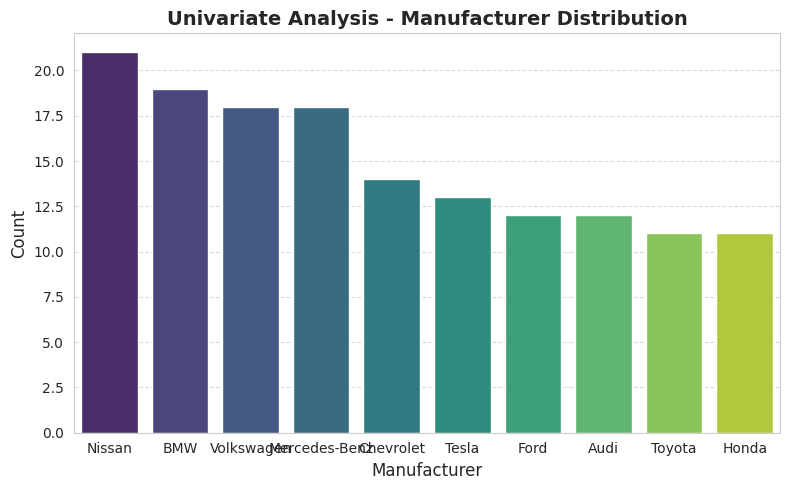

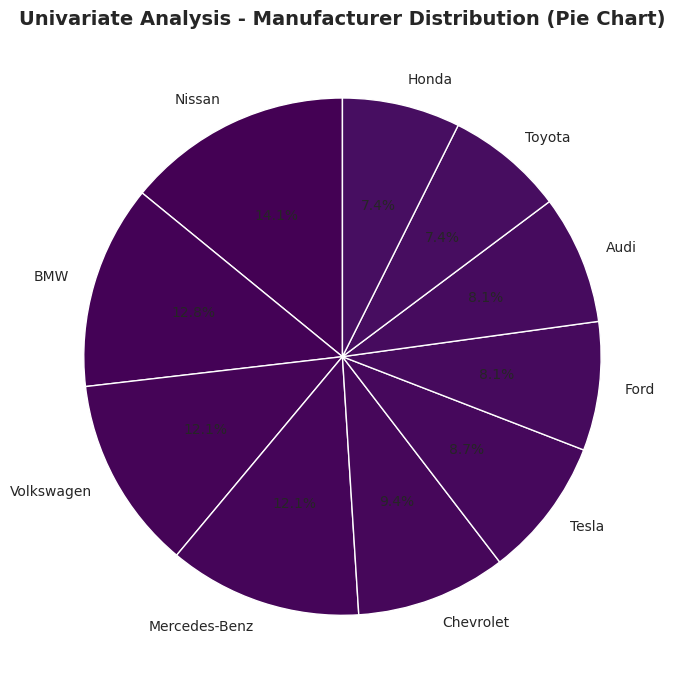

=== Summary Statistics for 'Price' ===
count      149.000000
mean     25374.610738
std      13870.086791
min       1166.000000
25%      13538.000000
50%      24964.000000
75%      37904.000000
max      49646.000000
Name: Price, dtype: float64 



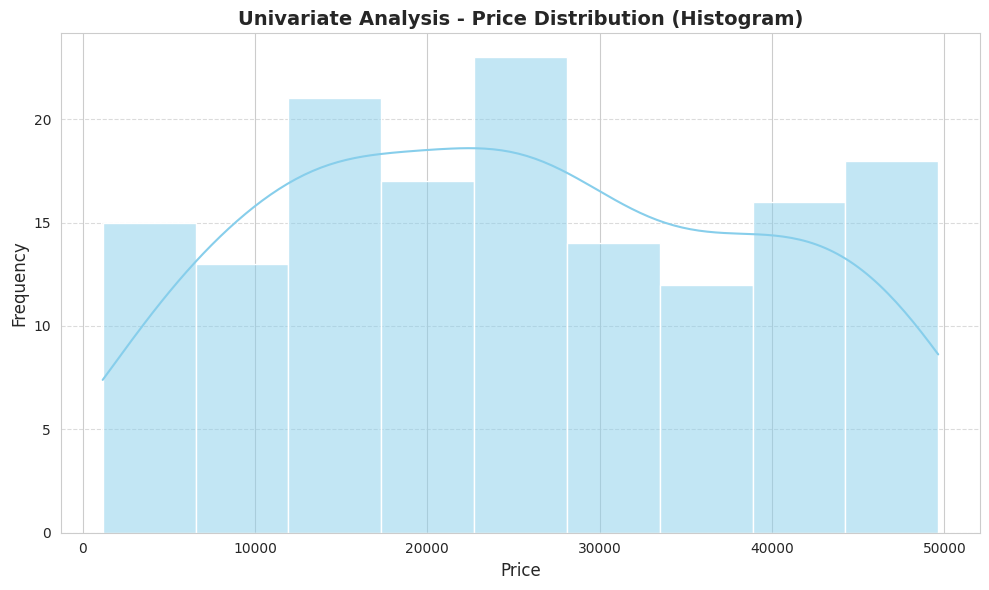

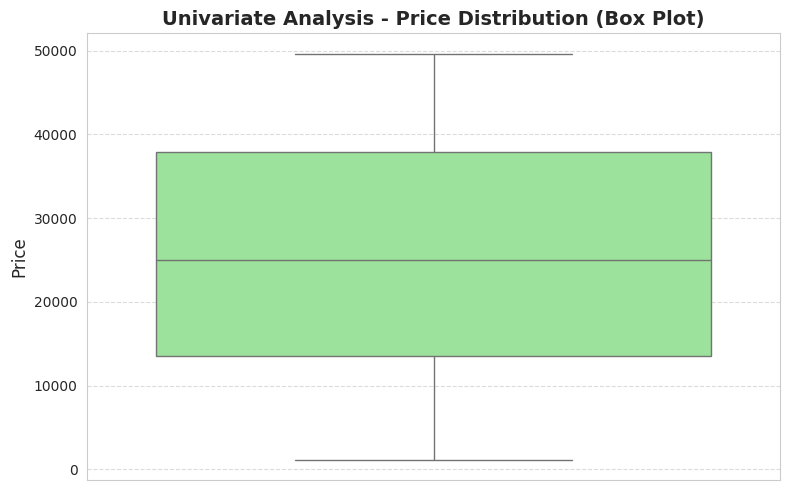

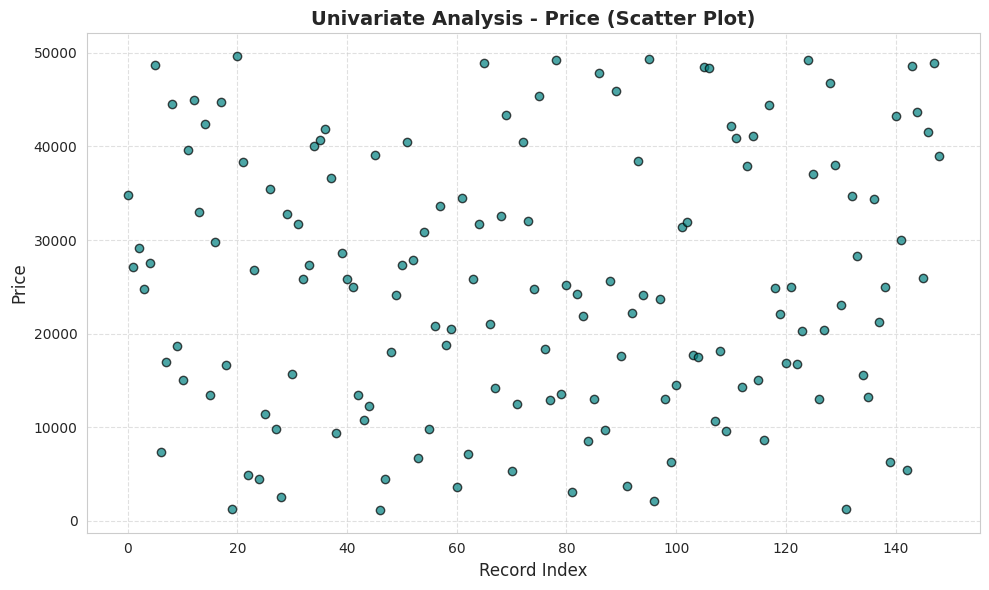

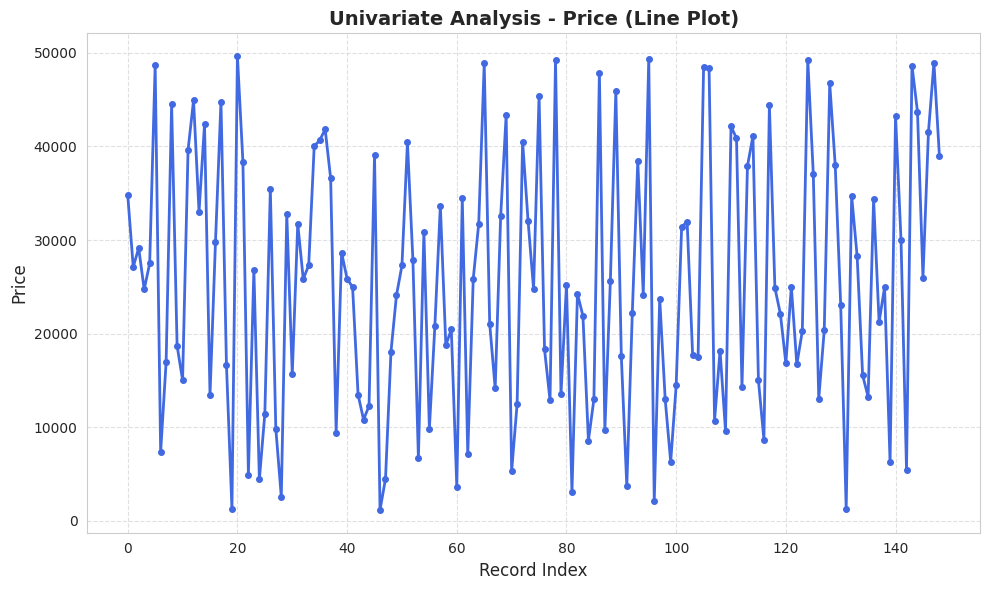

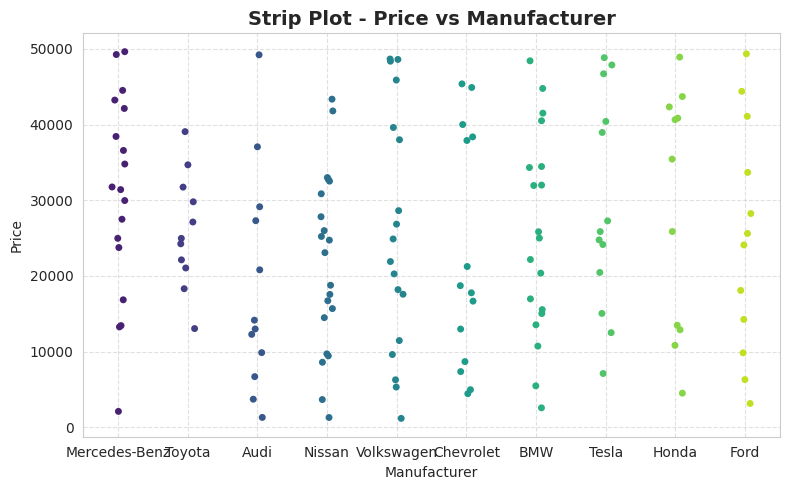

In [ ]:
# 1️⃣ Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2️⃣ Load dataset directly (if already downloaded manually)
# 👇 If running in Colab, first upload or mount your drive to access the file.
# For local setup, ensure car_sales.csv is in your working directory.

# Dataset Source: https://www.kaggle.com/datasets/suraj520/car-sales-data?resource=download
df = pd.read_excel("/content/second_car_sale.xlsx")   # <- Make sure this file is downloaded from Kaggle

# Rename the problematic column
df.rename(columns={'Price (Â£)': 'Price'}, inplace=True)

# 3️⃣ Display overview
print("===== Dataset Overview =====")
print(df.head(), "\n")
print(df.info(), "\n")

# 4️⃣ Select a categorical column for analysis
# The dataset typically includes columns like:
# 'Car_Model', 'Fuel_Type', 'Transmission', 'Seller_Type', 'Owner', etc.
# You can check using df.columns
print("Columns available:", df.columns.tolist(), "\n")

# Choose a categorical column for univariate analysis
cat_col = 'Manufacturer'   # change this to any categorical column in your dataset

# 5️⃣ Compute frequency counts
freq = df[cat_col].value_counts().reset_index()
freq.columns = [cat_col, 'Count']

print(f"=== Frequency of Categories in '{cat_col}' ===")
print(freq, "\n")

# 6️⃣ Visualization — Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(data=freq, x=cat_col, y='Count', palette='viridis', hue=cat_col, legend=False)

plt.title(f"Univariate Analysis - {cat_col} Distribution", fontsize=14, fontweight='bold')
plt.xlabel(cat_col, fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,7))
plt.pie(freq['Count'],  # Use the 'Count' column for the pie chart values
        labels=freq[cat_col],  # Use the 'Car Make' column for the labels
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.viridis.colors[:len(freq)],
        wedgeprops={'edgecolor':'white', 'linewidth':1})

plt.title(f"Univariate Analysis - {cat_col} Distribution (Pie Chart)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 7️⃣ Select a continuous column for analysis
# Choose a continuous column for univariate analysis
cont_col = 'Price' # change this to any continuous column in your dataset

# 8️⃣ Display summary statistics
print(f"=== Summary Statistics for '{cont_col}' ===")
print(df[cont_col].describe(), "\n")

# 9️⃣ Visualization — Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=cont_col, kde=True, color='skyblue')
plt.title(f"Univariate Analysis - {cont_col} Distribution (Histogram)", fontsize=14, fontweight='bold')
plt.xlabel(cont_col, fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 🔟 Visualization — Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y=cont_col, color='lightgreen')
plt.title(f"Univariate Analysis - {cont_col} Distribution (Box Plot)", fontsize=14, fontweight='bold')
plt.ylabel(cont_col, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 1️⃣1️⃣ Visualization — Scatter Plot (using index as x-axis)
plt.figure(figsize=(10,6))
plt.scatter(df.index, df[cont_col], alpha=0.7, color='teal', edgecolor='black')

plt.title(f"Univariate Analysis - {cont_col} (Scatter Plot)", fontsize=14, fontweight='bold')
plt.xlabel("Record Index", fontsize=12)
plt.ylabel(cont_col, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
# Visualization — Line Plot
plt.figure(figsize=(10,6))
plt.plot(df.index, df[cont_col], color='royalblue', linewidth=2, marker='o', markersize=4)

plt.title(f"Univariate Analysis - {cont_col} (Line Plot)", fontsize=14, fontweight='bold')
plt.xlabel("Record Index", fontsize=12)
plt.ylabel(cont_col, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
#  Visualization – Strip Plot
plt.figure(figsize=(8,5))
sns.stripplot(data=df, x=cat_col, y=cont_col, jitter=True, palette='viridis', hue=cat_col, legend=False)
plt.title(f"Strip Plot - {cont_col} vs {cat_col}", fontsize=14, fontweight='bold')
plt.xlabel(cat_col)
plt.ylabel(cont_col)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

TASK-3

Manufacturer    Model  Engine Size (L) Fuel Type  Year of Manufacture  \
0  Mercedes-Benz    Cruze         1.418475  Electric                 2013   
1         Toyota       A4         4.492330  Electric                 2003   
2           Audi  C-Class         4.739375  Electric                 2000   
3         Nissan  Model 3         3.128423    Petrol                 2011   
4  Mercedes-Benz     Golf         1.650279    Diesel                 2006   

   Mileage  Price  
0    61837  34792  
1   128993  27129  
2    81362  29141  
3   168204  24731  
4   119405  27493

Manufacturer            object
Model                   object
Engine Size (L)        float64
Fuel Type               object
Year of Manufacture      int64
Mileage                  int64
Price                    int64
dtype: object
Index(['Manufacturer', 'Model', 'Engine Size (L)', 'Fuel Type',
       'Year of Manufacture', 'Mileage', 'Price'],
      dtype='object')


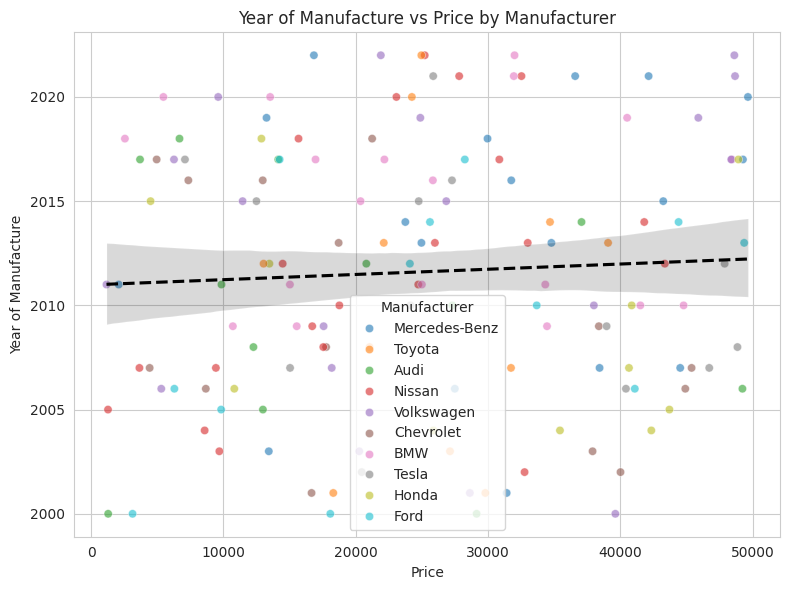

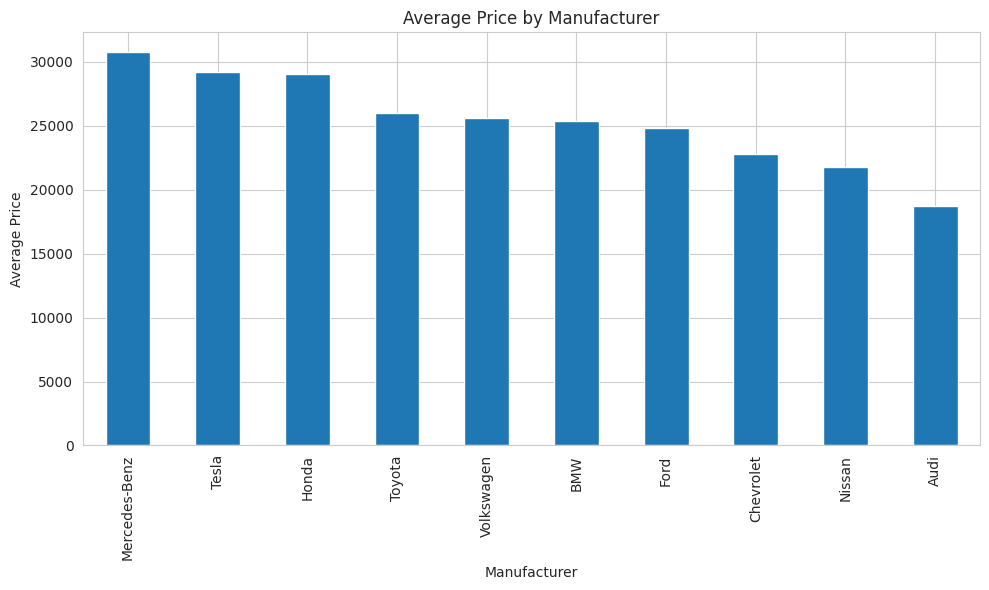

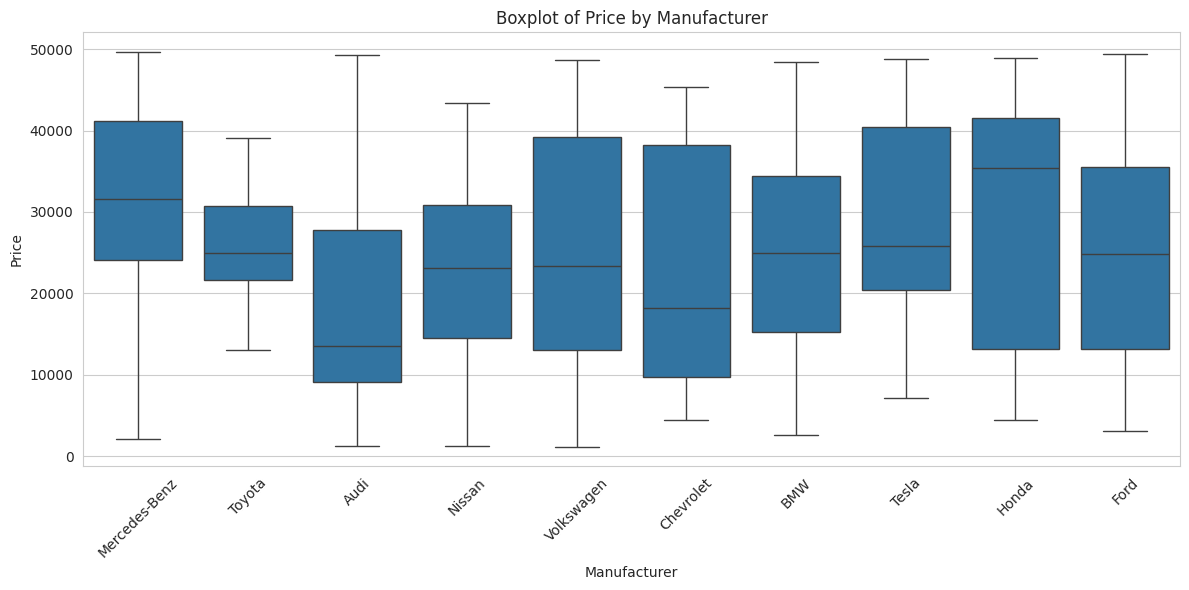

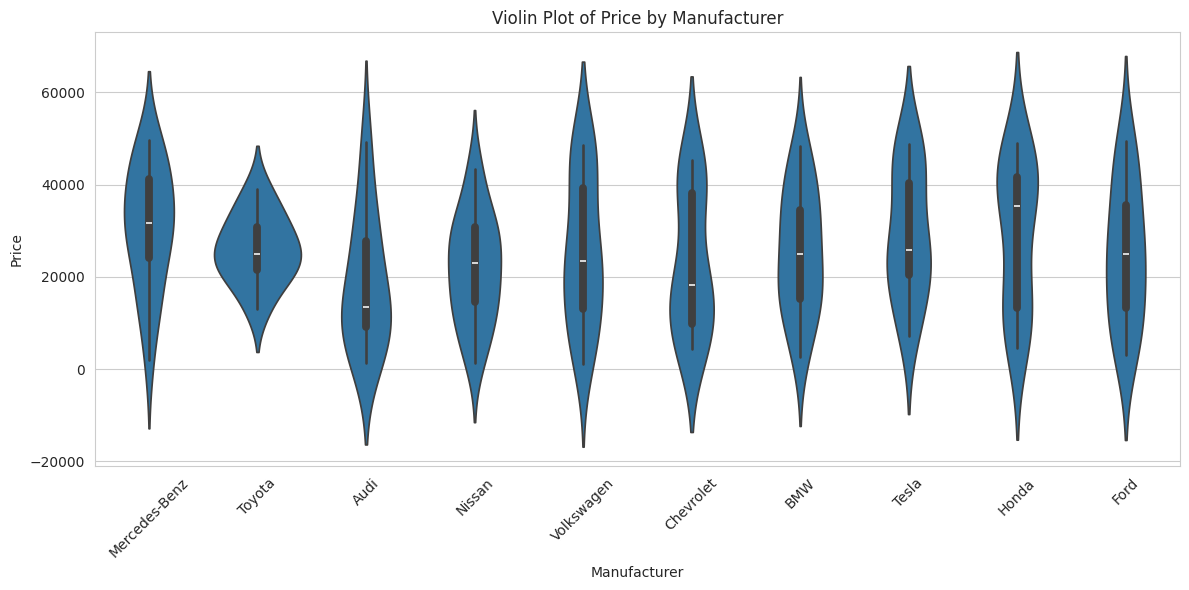

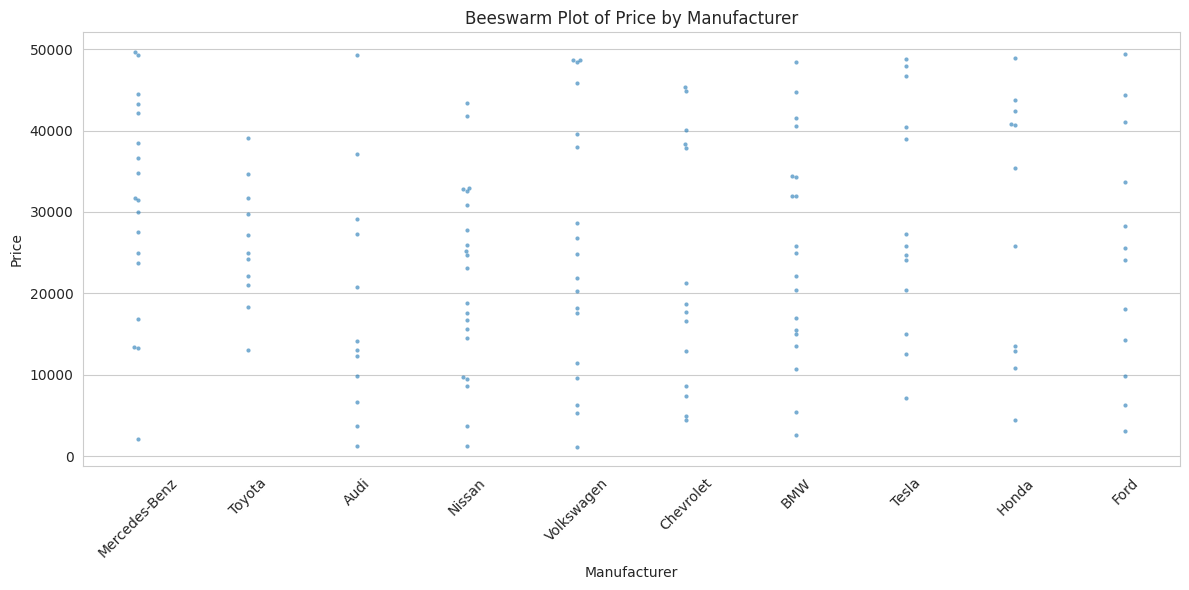

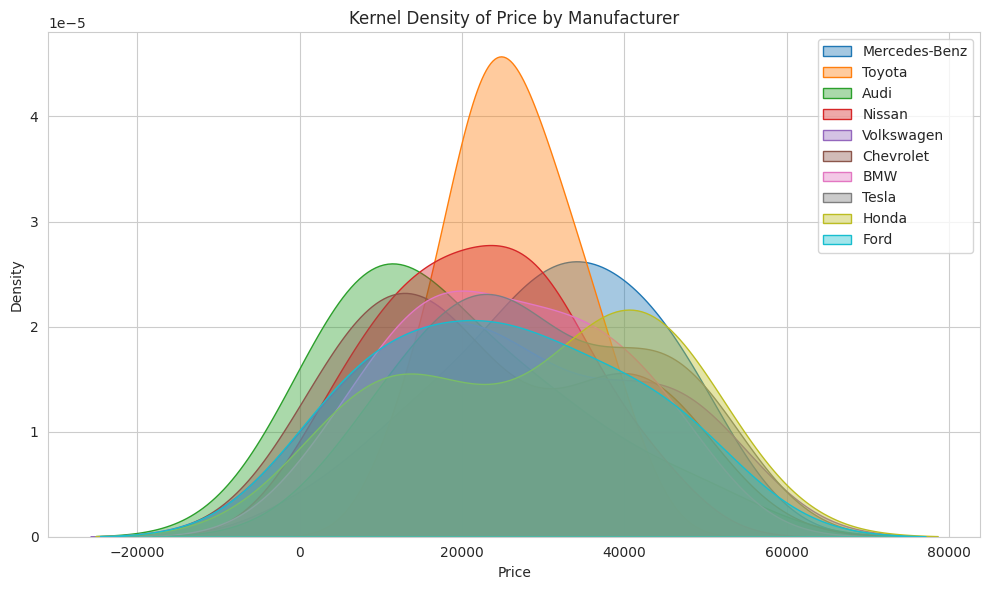

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

# load data
df = pd.read_excel("/content/second_car_sale.xlsx")  # adjust path/filename accordingly

# Rename the problematic column
df.rename(columns={'Price (Â£)': 'Price'}, inplace=True)

display(df.head())

# Example of column types (you should inspect)
print(df.dtypes)
print(df.columns)

# Suppose:
#   categorical_cols = ["Make", "Model", "Fuel_Type", "Transmission"]
#   continuous_cols = ["Price", "Mileage", "Engine_Size", "HP"]
# (adjust to actual names in your dataset)

categorical_cols = ["Manufacturer", "Fuel Type"] # Adjusted column names
continuous_cols = ["Price", "Mileage"] # Adjusted column names

### 2. Continuous vs Continuous
# (a) Scatterplot + fit line
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Price", y="Year of Manufacture", hue="Manufacturer", alpha=0.6) # Adjusted column names
sns.regplot(data=df, x="Price", y="Year of Manufacture", scatter=False, color="black", line_kws={'linestyle':'--'}) # Adjusted column names
plt.title("Year of Manufacture vs Price by Manufacturer") # Adjusted title
plt.tight_layout()
plt.show()

### 3. Categorical vs Continuous
# (a) Bar chart of summary statistics (mean Price by Make)
plt.figure(figsize=(10,6))
df.groupby("Manufacturer")["Price"].mean().sort_values(ascending=False).plot(kind="bar") # Adjusted column names
plt.ylabel("Average Price") # Adjusted label
plt.title("Average Price by Manufacturer") # Adjusted title
plt.tight_layout()
plt.show()

# (b) Box plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Manufacturer", y="Price") # Adjusted column names
plt.title("Boxplot of Price by Manufacturer") # Adjusted title
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# (c) Violin plot
plt.figure(figsize=(12,6))
sns.violinplot(data=df, x="Manufacturer", y="Price") # Adjusted column names
plt.title("Violin Plot of Price by Manufacturer") # Adjusted title
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# (d) Beeswarm / swarm plot
plt.figure(figsize=(12,6))
sns.swarmplot(data=df, x="Manufacturer", y="Price", size=3, alpha=0.6) # Adjusted column names
plt.title("Beeswarm Plot of Price by Manufacturer") # Adjusted title
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# (f) Kernel-density plots grouped by categorical
plt.figure(figsize=(10,6))
for make in df["Manufacturer"].unique():
    subset = df[df["Manufacturer"]==make]
    sns.kdeplot(subset["Price"], label=make, fill=True, alpha=0.4)
plt.title("Kernel Density of Price by Manufacturer")
plt.legend()
plt.tight_layout()
plt.show()

TASK-4

Manufacturer    Model  Engine Size (L) Fuel Type  Year of Manufacture  \
0  Mercedes-Benz    Cruze         1.418475  Electric                 2013   
1         Toyota       A4         4.492330  Electric                 2003   
2           Audi  C-Class         4.739375  Electric                 2000   
3         Nissan  Model 3         3.128423    Petrol                 2011   
4  Mercedes-Benz     Golf         1.650279    Diesel                 2006   

   Mileage  Price  
0    61837  34792  
1   128993  27129  
2    81362  29141  
3   168204  24731  
4   119405  27493

Manufacturer            object
Model                   object
Engine Size (L)        float64
Fuel Type               object
Year of Manufacture      int64
Mileage                  int64
Price                    int64
dtype: object
Index(['Manufacturer', 'Model', 'Engine Size (L)', 'Fuel Type',
       'Year of Manufacture', 'Mileage', 'Price'],
      dtype='object')


<Figure size 1000x1000 with 0 Axes>

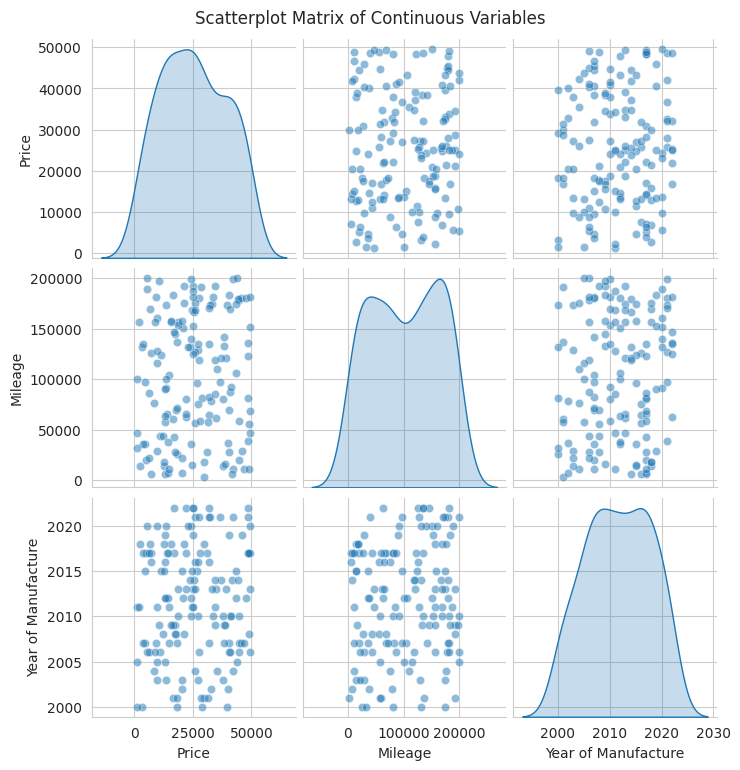

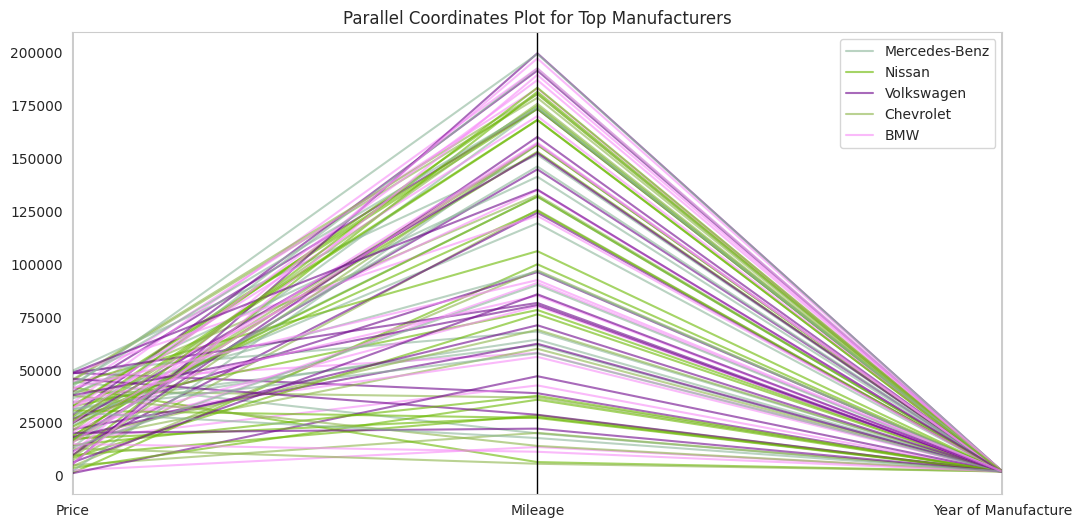

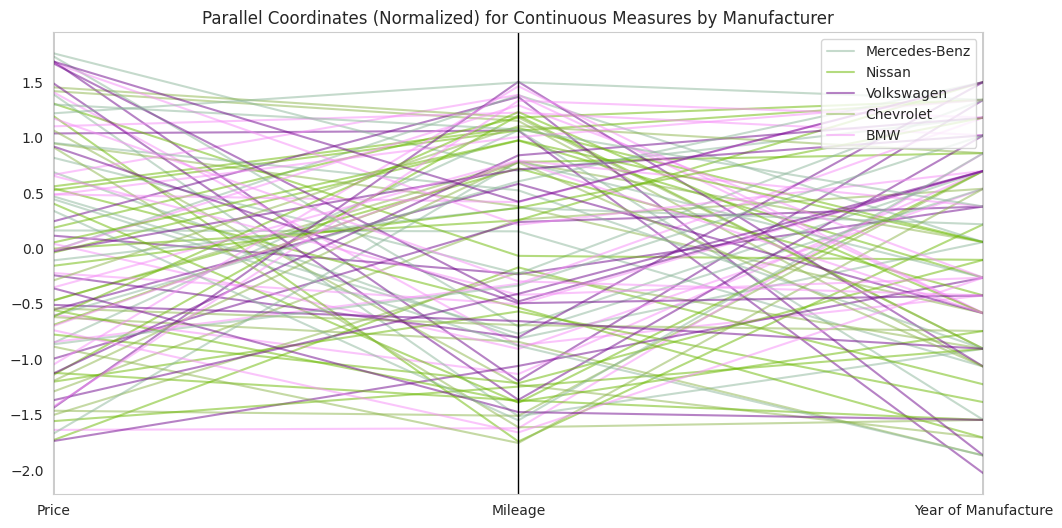

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

# Load the data
df = pd.read_excel("/content/second_car_sale.xlsx")  # adjust path/filename accordingly

# Rename the problematic column
df.rename(columns={'Price (Â£)': 'Price'}, inplace=True)

display(df.head())

# Inspect
print(df.dtypes)
print(df.columns)

# Example assumed columns (adjust to actual):
# continuous_cols = ["price", "mileage", "year", "engine_size"]
# categorical_cols = ["make", "model", "fuel_type", "transmission"]
# date_col = "sale_date"

continuous_cols = ["Price", "Mileage", "Year of Manufacture"]
categorical_cols = ["Manufacturer", "Fuel Type"]

### 1. Scatterplot Matrix (Pairplot) — continuous variables
plt.figure(figsize=(10,10))
sns.pairplot(df[continuous_cols].dropna(), diag_kind='kde', kind='scatter', plot_kws={'alpha':0.5})
plt.suptitle("Scatterplot Matrix of Continuous Variables", y=1.02)
plt.show()

### 2. Parallel Coordinates — mix categorical & continuous
from pandas.plotting import parallel_coordinates

# For parallel coordinates, we need a categorical grouping. For example 'make' for top few makes.
top_makes = df['Manufacturer'].value_counts().nlargest(5).index
df_sub = df[df['Manufacturer'].isin(top_makes)][continuous_cols + ['Manufacturer']].dropna()
plt.figure(figsize=(12,6))
parallel_coordinates(df_sub, class_column='Manufacturer', cols=continuous_cols, alpha=0.6)
plt.title("Parallel Coordinates Plot for Top Manufacturers")
plt.legend(loc='upper right')
plt.show()

### 3. Line Graph — e.g., trend of average price over time
# First convert date column if present
# Assuming 'Date' column exists and needs to be converted to datetime
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    # Resample monthly/yearly
    monthly = df.resample('M').agg({'Price': 'mean', 'Mileage':'mean'}).dropna()
    plt.figure(figsize=(10,6))
    plt.plot(monthly.index, monthly['Price'], label='Avg Price')
    plt.plot(monthly.index, monthly['Mileage'], label='Avg Mileage')
    plt.title("Monthly Trend: Average Price & Mileage")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    plt.show()
else:
    print("Warning: 'Date' column not found. Skipping time series plots.")


### 4. Stacked Bar Chart — e.g., count by transmission over years
# Create year column from date
# Assuming 'Date' column exists
if 'Date' in df.columns:
    df['sale_year'] = df.index.year
    # Assuming 'Fuel Type' is the relevant categorical column for this plot
    ct = pd.crosstab(df['sale_year'], df['Fuel Type'])
    ct.plot(kind='bar', stacked=True, figsize=(10,6))
    plt.title("Count of Fuel Types Over Years (Stacked)")
    plt.xlabel("Sale Year")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
else:
    print("Warning: 'Date' column not found. Skipping stacked bar chart.")

### Additional: Parallel coordinates with normalized values
from sklearn.preprocessing import StandardScaler
# Ensure the columns exist and handle potential missing values before scaling
if all(col in df_sub.columns for col in continuous_cols):
    scaled = StandardScaler().fit_transform(df_sub[continuous_cols])
    df_norm = pd.DataFrame(scaled, columns=continuous_cols)
    df_norm['Manufacturer'] = df_sub['Manufacturer'].values
    plt.figure(figsize=(12,6))
    parallel_coordinates(df_norm, 'Manufacturer', cols=continuous_cols, alpha=0.5)
    plt.title("Parallel Coordinates (Normalized) for Continuous Measures by Manufacturer")
    plt.show()
else:
    print("Warning: Not all specified continuous columns found in the subset dataframe. Skipping normalized parallel coordinates plot.")

TASK-5

In [ ]:
# Imports
import pandas as pd
import plotly.express as px

# Load the data
df = pd.read_excel("/content/second_car_sale.xlsx")   # adjust path/filename as needed

# Rename the problematic column
df.rename(columns={'Price (Â£)': 'Price'}, inplace=True)

display(df.head())

# Inspect columns/types
print(df.dtypes)
print(df.columns)

# Suppose these columns (adjust to your dataset):
# categorical hierarchy: e.g. 'Make' → 'Model' → 'Fuel_Type'
# continuous value: e.g. 'Price' or 'Mileage'

# Example: create a Treemap
fig_tm = px.treemap(
    df,
    path=[px.Constant("All Cars"), 'Manufacturer', 'Model', 'Fuel Type'],  # root plus levels
    values='Price',     # size of each rectangle = sum of Price (or use count if you prefer)
    color='Price',      # colour scale by Price (optional)
    color_continuous_scale='RdBu',
    title="Treemap of Car Sales: Manufacturer → Model → Fuel Type (size = Price)"
)
fig_tm.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig_tm.show()

# Example: create a Sunburst chart
fig_sb = px.sunburst(
    df,
    path=['Manufacturer', 'Model', 'Fuel Type'],   # levels of the hierarchy
    values='Price',
    color='Price',
    color_continuous_scale='Viridis',
    title="Sunburst Chart: Manufacturer → Model → Fuel Type (size = Price)"
)
fig_sb.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig_sb.show()

Manufacturer    Model  Engine Size (L) Fuel Type  Year of Manufacture  \
0  Mercedes-Benz    Cruze         1.418475  Electric                 2013   
1         Toyota       A4         4.492330  Electric                 2003   
2           Audi  C-Class         4.739375  Electric                 2000   
3         Nissan  Model 3         3.128423    Petrol                 2011   
4  Mercedes-Benz     Golf         1.650279    Diesel                 2006   

   Mileage  Price  
0    61837  34792  
1   128993  27129  
2    81362  29141  
3   168204  24731  
4   119405  27493

Manufacturer            object
Model                   object
Engine Size (L)        float64
Fuel Type               object
Year of Manufacture      int64
Mileage                  int64
Price                    int64
dtype: object
Index(['Manufacturer', 'Model', 'Engine Size (L)', 'Fuel Type',
       'Year of Manufacture', 'Mileage', 'Price'],
      dtype='object')


TASK-6

    Manufacturer    Model  Engine Size (L) Fuel Type  Year of Manufacture  \
0  Mercedes-Benz    Cruze         1.418475  Electric                 2013   
1         Toyota       A4         4.492330  Electric                 2003   
2           Audi  C-Class         4.739375  Electric                 2000   
3         Nissan  Model 3         3.128423    Petrol                 2011   
4  Mercedes-Benz     Golf         1.650279    Diesel                 2006   

   Mileage  Price  
0    61837  34792  
1   128993  27129  
2    81362  29141  
3   168204  24731  
4   119405  27493  


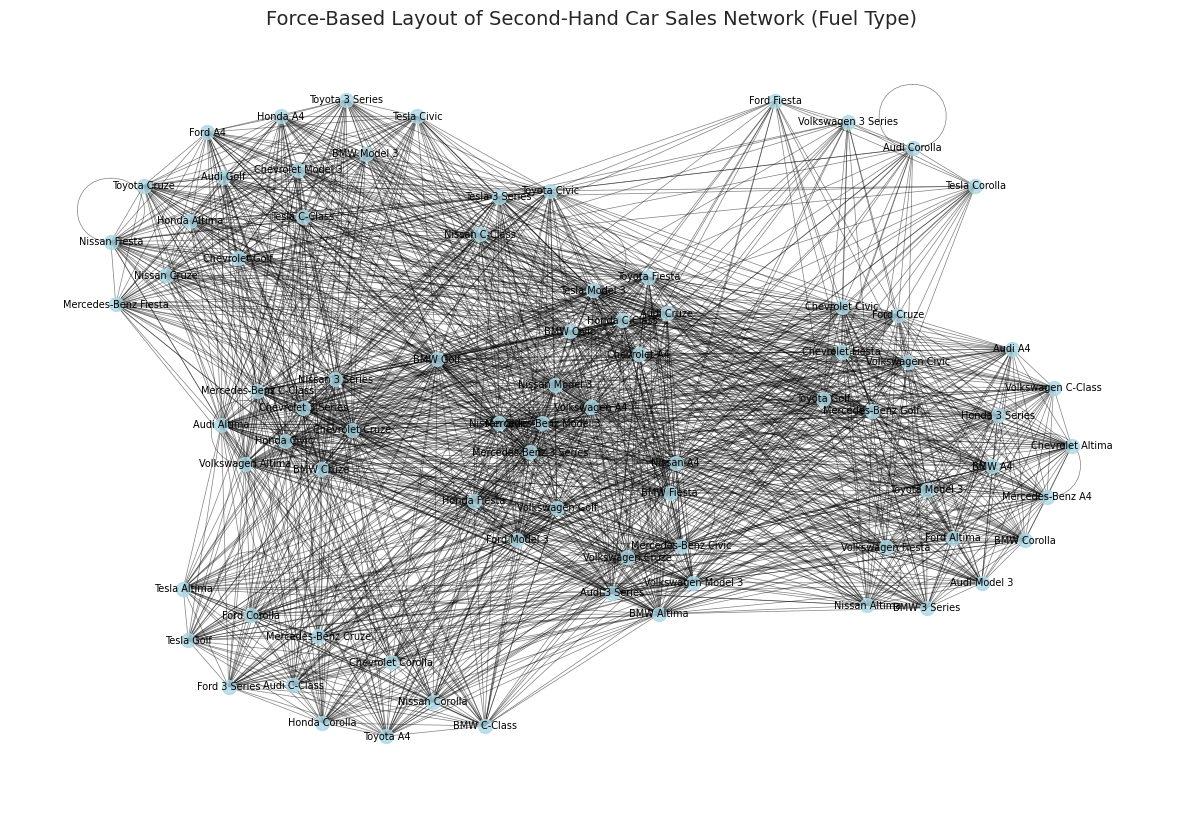

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Load the Car Sales dataset (Devant Ltd. Analysing Second Hand Car Sales Data)
# Update file path as needed
try:
    df = pd.read_excel("/content/second_car_sale.xlsx") # Use read_excel for .xlsx files
except FileNotFoundError:
    print("Could not find the file. Please ensure the file path is correct.")
    exit()

# Rename the problematic column
df.rename(columns={'Price (Â£)': 'Price'}, inplace=True)

# Check the first few rows
print(df.head())

# Select relevant columns
df = df[['Manufacturer', 'Model', 'Price', 'Fuel Type']].dropna()

# Create a combined 'Car_Name' column if not present
df['Car_Name'] = df['Manufacturer'] + " " + df['Model']

# Initialize Graph
G = nx.Graph()

# Add nodes with attributes
for _, row in df.iterrows():
    G.add_node(row['Car_Name'], price=row['Price'], fuel=row['Fuel Type'])

# Function to add edges efficiently
def add_edges_by_attribute(attribute):
    """Add edges between all cars sharing the same attribute value."""
    for value, group in df.groupby(attribute):
        cars = list(group['Car_Name'])
        # Ensure there are at least two cars to form a combination
        if len(cars) > 1:
            for car1, car2 in combinations(cars, 2):
                G.add_edge(car1, car2, relation=attribute)


# Add edges based on Fuel_Type
add_edges_by_attribute('Fuel Type')

# Apply a force-directed layout
pos = nx.spring_layout(G, k=0.4, iterations=40)

# Draw graph
plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(G, pos, node_size=100, node_color="lightblue", alpha=0.8)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=7)

plt.title("Force-Based Layout of Second-Hand Car Sales Network (Fuel Type)", fontsize=14)
plt.axis('off')
plt.show()

TASK-7

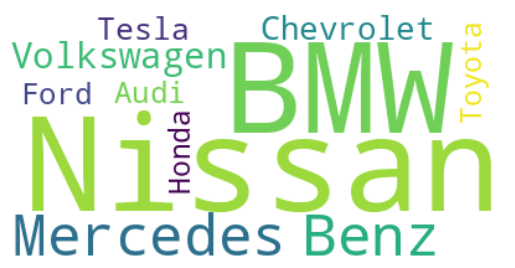

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
# Importing Dataset
df = pd.read_excel("/content/second_car_sale.xlsx")
#Creating the text variable
text = " ".join(cat for cat in df.Manufacturer)
# Creating word_cloud with text as an argument in .generate() method
word_cloud = WordCloud(collocations=False, background_color='white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

TASK-8

Data Loaded: (149, 7)
    Manufacturer    Model  Engine Size (L) Fuel Type  Year of Manufacture  \
0  Mercedes-Benz    Cruze         1.418475  Electric                 2013   
1         Toyota       A4         4.492330  Electric                 2003   
2           Audi  C-Class         4.739375  Electric                 2000   
3         Nissan  Model 3         3.128423    Petrol                 2011   
4  Mercedes-Benz     Golf         1.650279    Diesel                 2006   

   Mileage  Price (Â£)  
0    61837       34792  
1   128993       27129  
2    81362       29141  
3   168204       24731  
4   119405       27493  

Cleaned Columns (after cleaning): ['manufacturer', 'model', 'engine size l', 'fuel type', 'year of manufacture', 'mileage', 'price']

Columns before dropna: ['manufacturer', 'model', 'engine size l', 'fuel type', 'year of manufacture', 'mileage', 'price']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 7 columns):
 #  

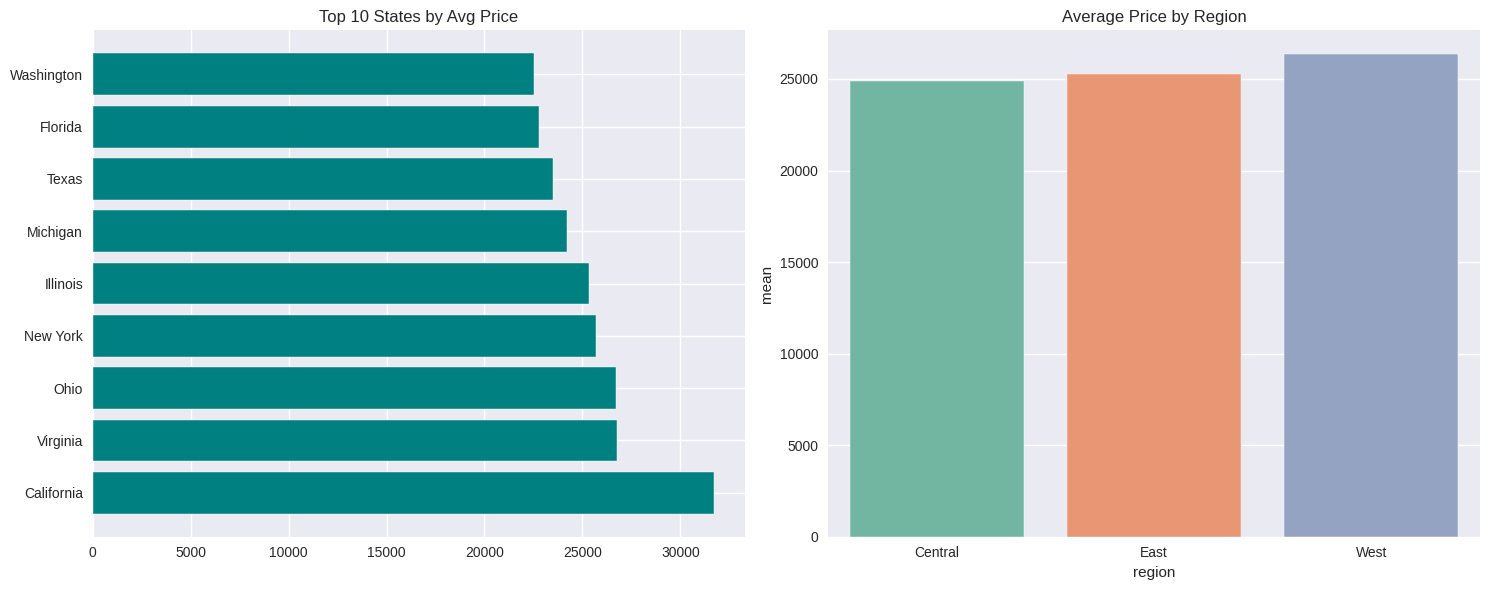


--- SUMMARY ---
Total Cars: 149, Avg Price: $25,374.61
Top 5 States by Avg Price:
         State     Avg_Price
0  California  31705.600000
7    Virginia  26773.250000
5        Ohio  26729.600000
4    New York  25713.461538
2    Illinois  25335.181818
Price by Region:
     region          mean  count
0  Central  24912.242424     66
1     East  25284.553191     47
2     West  26339.861111     36


In [ ]:
# ---------- Import Libraries ----------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

# -------------------------------
# 1. Load & Prepare Data
# -------------------------------
df = pd.read_excel("/content/second_car_sale.xlsx")  # replace with your dataset path
print("Data Loaded:", df.shape)
print(df.head())

# Clean up columns and rename problematic price column
df.columns = df.columns.str.replace(r'[^\w\s]', '', regex=True).str.strip().str.lower()
# Correctly rename the price column
df.rename(columns={'price â': 'price'}, inplace=True)


# Create a new DataFrame to ensure index is reset
df = df[df.columns]

print("\nCleaned Columns (after cleaning):", df.columns.tolist()) # Print column names after cleaning
print("\nColumns before dropna:", df.columns.tolist()) # Print column names before dropna
print("\nDataFrame columns and dtypes before dropna:\n", df.info()) # Print DataFrame columns and dtypes before dropna
# Removed 'fueltype' from dropna subset due to persistent KeyError
df = df.dropna(subset=['price', 'mileage'])


# If there's no 'state' column, create a synthetic one (for visualization demo)
if 'state' not in df.columns:
    import random
    states = ['California','Texas','New York','Florida','Illinois','Washington','Ohio','Michigan','Virginia']
    df['state'] = np.random.choice(states, size=len(df))
    df['region'] = df['state'].map({
        'California':'West','Washington':'West','Texas':'Central','Ohio':'Central',
        'Michigan':'Central','New York':'East','Florida':'East','Virginia':'East','Illinois':'Central'
    })

# -------------------------------
# 2. Aggregate Price by State & Region
# -------------------------------
state_sales = df.groupby('state')['price'].agg(['mean','count']).reset_index().sort_values('mean', ascending=False)
region_sales = df.groupby('region')['price'].agg(['mean','count']).reset_index()
state_sales.columns = ['State','Avg_Price','Car_Count']

# -------------------------------
# 3. Plotly Choropleth (Avg Price by State)
# -------------------------------
abbr = {'California':'CA','Texas':'TX','New York':'NY','Florida':'FL','Illinois':'IL',
        'Washington':'WA','Ohio':'OH','Michigan':'MI','Virginia':'VA'}
state_sales['Abbr'] = state_sales['State'].map(abbr)

fig = px.choropleth(state_sales, locations='Abbr', locationmode='USA-states',
                    color='Avg_Price', scope='usa', color_continuous_scale='Viridis',
                    title='Average Used Car Price by State', hover_name='State')
fig.update_layout(title_x=0.5)
fig.show()

# -------------------------------
# 4. Basic Visuals (Top States & Regions)
# -------------------------------
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
top = state_sales.head(10)
ax[0].barh(top['State'], top['Avg_Price'], color='teal')
ax[0].set_title('Top 10 States by Avg Price')
sns.barplot(x='region', y='mean', data=region_sales, ax=ax[1], palette='Set2')
ax[1].set_title('Average Price by Region')
plt.tight_layout()
plt.show()

# -------------------------------
# 5. Folium Interactive Map
# -------------------------------
coords = {
    'California':[36.7,-119.4],'Texas':[31.9,-99.9],'New York':[40.7,-74.0],
    'Florida':[27.7,-81.5],'Illinois':[40.6,-89.4],'Washington':[47.4,-120.7],
    'Ohio':[40.4,-82.9],'Michigan':[44.3,-85.6],'Virginia':[37.5,-78.7]
}

m = folium.Map(location=[39.8,-98.6], zoom_start=4, tiles='CartoDB positron')

for _, row in state_sales.iterrows():
    if row['State'] in coords:
        lat, lon = coords[row['State']]
        folium.CircleMarker(
            [lat, lon],
            radius=np.log(row['Avg_Price'])*2,
            color='blue', fill=True,
            tooltip=f"{row['State']}: ${row['Avg_Price']:.0f}"
        ).add_to(m)

m.save("used_car_prices_map.html")

# -------------------------------
# 6. Heatmap: FuelType vs Transmission (instead of State vs Region)
# -------------------------------
# Removed heatmap as 'transmission' column is missing.
# pivot = df.pivot_table(values='price', index='fueltype', columns='transmission', aggfunc='mean', fill_value=0)
# plt.figure(figsize=(8,6))
# sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt=".0f")
# plt.title("Average Price Heatmap: Fuel Type vs Transmission")
# plt.show()

# -------------------------------
# 7. Summary Insights
# -------------------------------
print("\n--- SUMMARY ---")
print(f"Total Cars: {len(df):,}, Avg Price: ${df['price'].mean():,.2f}")
print("Top 5 States by Avg Price:\n", state_sales.head(5)[['State','Avg_Price']])
print("Price by Region:\n", region_sales)

TASK-9

Columns available: Index(['Manufacturer', 'Model', 'Engine Size (L)', 'Fuel Type',
       'Year of Manufacture', 'Mileage', 'Price (Â£)'],
      dtype='object')
              Sales
Date               
2022-01-31  34792.0
2022-02-28  27129.0
2022-03-31  29141.0
2022-04-30  24731.0
2022-05-31  27493.0


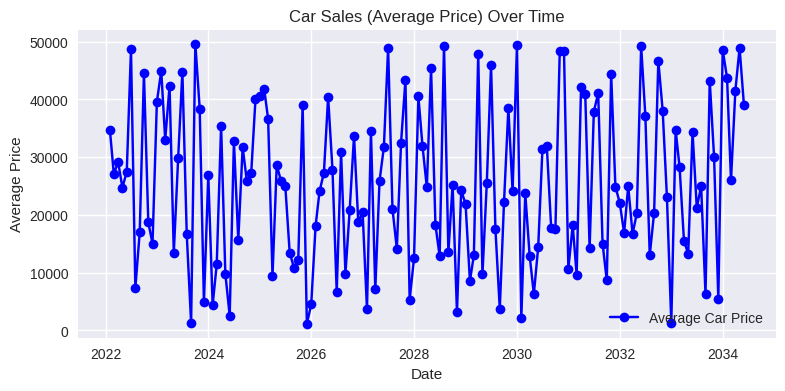

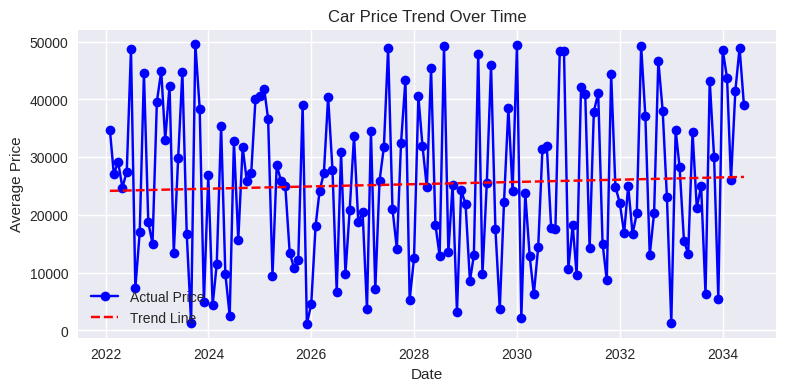

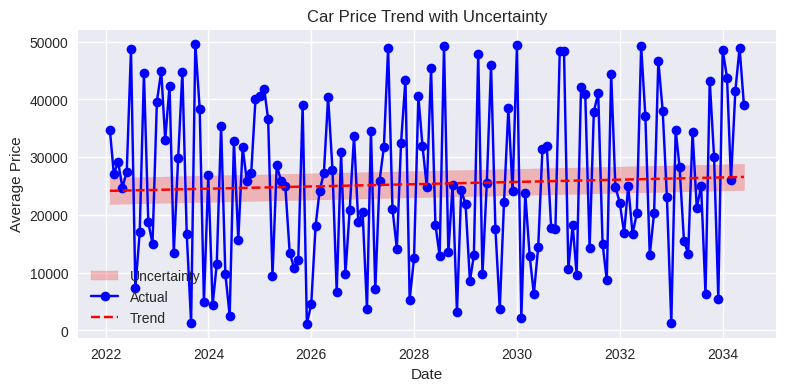

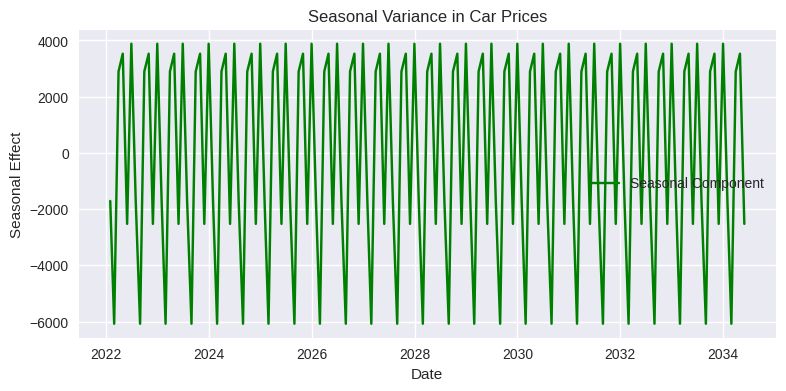

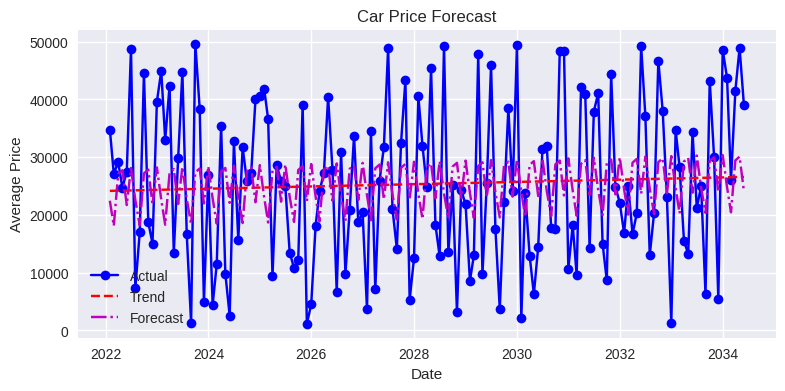

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# -------------------------------------------------------------
# 1. Load the dataset
# -------------------------------------------------------------
# Replace the path with the actual file name downloaded from Kaggle
# Added encoding parameter to handle potential encoding issues
# Changed to read_excel for .xlsx file
df = pd.read_excel("/content/second_car_sale.xlsx")

# Display columns to understand structure
print("Columns available:", df.columns)

# -------------------------------------------------------------
# 2. Prepare data for time series analysis
# -------------------------------------------------------------
# Many Kaggle car datasets have columns like 'Date_Sold', 'Price', or 'Year'
# We'll create a pseudo-time series using Year or a Date column if available.

# If there's no date column, simulate one (monthly intervals)
if 'Date' not in df.columns:
    df = df.head(200)  # use first 200 rows for example
    df['Date'] = pd.date_range(start='2022-01-01', periods=len(df), freq='MS')

# Ensure price column exists (adjust if your dataset uses 'price' or 'Price (£)')
price_col = None
for col in df.columns:
    if 'price' in col.lower() or 'price (£)' in col.lower():
        price_col = col
        break

if price_col is None:
    raise ValueError("No price column found in dataset. Check column names.")

# Keep only date and price columns
sales_df = df[['Date', price_col]].copy()
sales_df.rename(columns={price_col: 'Sales'}, inplace=True)

# Convert Date to datetime
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

# Convert 'Sales' column to numeric, coercing errors to NaN
sales_df['Sales'] = pd.to_numeric(sales_df['Sales'], errors='coerce')

# Group by month to get average sales per month (if many records)
sales_df = sales_df.groupby(pd.Grouper(key='Date', freq='M')).mean().reset_index()

# Set Date as index
sales_df.set_index('Date', inplace=True)
print(sales_df.head())

# -------------------------------------------------------------
# 3. Plot sales over time
# -------------------------------------------------------------
plt.figure(figsize=(9, 4))
plt.plot(sales_df.index, sales_df['Sales'], marker='o', color='blue', label='Average Car Price')
plt.title("Car Sales (Average Price) Over Time")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.grid(True)
plt.legend()
plt.show()

# -------------------------------------------------------------
# 4. Compute and plot trend line using OLS
# -------------------------------------------------------------
X = np.arange(len(sales_df)).reshape(-1, 1)
X = sm.add_constant(X)
model = sm.OLS(sales_df['Sales'], X).fit()
sales_df['Trend'] = model.predict(X)

plt.figure(figsize=(9, 4))
plt.plot(sales_df.index, sales_df['Sales'], marker='o', color='b', label='Actual Price')
plt.plot(sales_df.index, sales_df['Trend'], linestyle='--', color='r', label='Trend Line')
plt.title("Car Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------------------------------------
# 5. Plot area chart with uncertainty
# -------------------------------------------------------------
plt.figure(figsize=(9, 4))
plt.fill_between(
    sales_df.index,
    sales_df['Trend'] - model.bse[0],
    sales_df['Trend'] + model.bse[0],
    color='lightcoral',
    alpha=0.5,
    label='Uncertainty'
)
plt.plot(sales_df.index, sales_df['Sales'], marker='o', color='b', label='Actual')
plt.plot(sales_df.index, sales_df['Trend'], linestyle='--', color='r', label='Trend')
plt.title("Car Price Trend with Uncertainty")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------------------------------------
# 6. Seasonal Decomposition
# -------------------------------------------------------------
# period=6 means half-yearly seasonality assumption
decomposition = sm.tsa.seasonal_decompose(sales_df['Sales'], model='additive', period=6)
seasonal = decomposition.seasonal

plt.figure(figsize=(9, 4))
plt.plot(sales_df.index, seasonal, color='green', label='Seasonal Component')
plt.title("Seasonal Variance in Car Prices")
plt.xlabel("Date")
plt.ylabel("Seasonal Effect")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------------------------------------
# 7. Forecast (Trend + Seasonal)
# -------------------------------------------------------------
sales_df['Forecast'] = sales_df['Trend'] + seasonal

plt.figure(figsize=(9, 4))
plt.plot(sales_df.index, sales_df['Sales'], marker='o', color='b', label='Actual')
plt.plot(sales_df.index, sales_df['Trend'], linestyle='--', color='r', label='Trend')
plt.plot(sales_df.index, sales_df['Forecast'], linestyle='-.', color='m', label='Forecast')
plt.title("Car Price Forecast")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.legend()
plt.grid(True)
plt.show()